In [1]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent() # i ile kısayol tanımladık aslında i bizim fotoğrafımız.

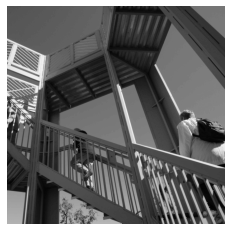

In [2]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [4]:
i_copy = np.copy(i)
size_x = i_copy.shape[0]
size_y = i.copy().shape[1]

In [44]:
#filter = [[-1, -2, -1], [1, -4, 1], [0, 1, 0]]
#filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]] 
#filter = [ [1, 5, 2], [-1, 0, 2], [1, -4, 1]]  
filter = [ [-1, -1, -1], [1, -1, 2], [1, 2, -1]]    # bu filtreleri tek tek kendimiz deneyerek sonuçları inceleyebiliriz.

weight = 1

In [45]:
for x in range(1, size_x-1):
  for y in range(1, size_y-1):
    convolution = 0.0
    convolution = convolution + (i[x - 1, y-1] * filter[0][0])
    convolution = convolution + (i[x, y-1] * filter[0][1])
    convolution = convolution + (i[x + 1, y-1] * filter[0][2])
    convolution = convolution + (i[x-1, y] * filter[1][0])
    convolution = convolution + (i[x, y] * filter[1][1])
    convolution = convolution + (i[x+1, y] * filter[1][2])
    convolution = convolution + (i[x-1, y+1] * filter[2][0])
    convolution = convolution + (i[x, y+1] * filter[2][1])
    convolution = convolution + (i[x+1, y+1] * filter[2][2])
    convolution = convolution * weight
    if(convolution<0):
      convolution = 0
    if(convolution > 255):
      convolution = 255
    
    i_copy[x, y] = convolution

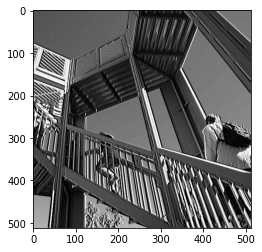

In [46]:
plt.gray()
plt.grid(False)
plt.imshow(i_copy);

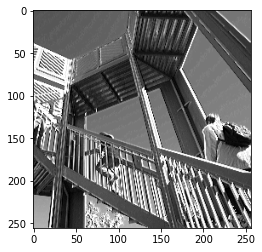

In [47]:
new_x = int(size_x/2)
new_y = int(size_y/2)

newImage = np.zeros((new_x, new_y))

for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_copy[x, y])
    pixels.append(i_copy[x+1, y])
    pixels.append(i_copy[x, y+1])
    pixels.append(i_copy[x+1, y+1])

    newImage[int(x/2), int(y/2)] = max(pixels)

plt.gray()
plt.grid(False)
plt.imshow(newImage);